<a href="https://colab.research.google.com/github/simics-ja/lecture-stats/blob/master/Lecture_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[スライド](https://docs.google.com/presentation/d/1YkkoNyDULe1KW9Vkh9zLyQIutzUgIeGegGbziBRF7nM/edit?usp=sharing)

# 演習1 正規分布を描いてみよう
指定した平均と標準偏差の正規分布に従う母集団から，指定した標本数だけのデータを取得してヒストグラム（度数分布）を描画します．

,count,mean,std,min,25%,50%,75%,max
0,20.0,103.92778,10.293948,83.964476,97.377636,104.247641,111.670704,127.157869


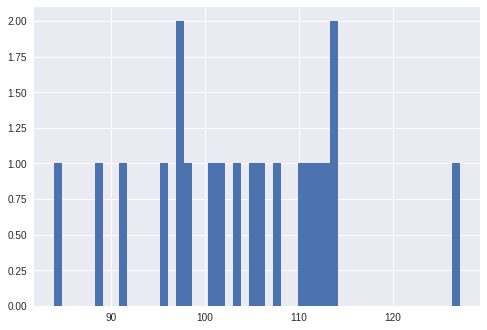

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#@markdown ### 母集団のパラメータ
平均 = 100 #@param {type: "number"}
標準偏差 = 10 #@param {type: "number"}
#@markdown ### 母集団から取得する標本数
標本数 = 20 #@param {type: "number"}
#@markdown ### ヒストグラムの細かさ
階級数 = 50 #@param {type: "number"}
values = np.random.normal(平均, 標準偏差, 標本数)
plt.hist(values, bins=階級数)
pd.DataFrame(pd.Series(values.ravel()).describe()).transpose()

#@markdown Command/Control + Enterでも実行可能

In [3]:
# valuesの中身が見たいとき
values #print(values)でもOK

array([ 92.26934689,  99.45467267, 106.28612865, 113.4480991 ,
       103.75231324, 101.33850614,  96.81659147, 114.3994236 ,
       108.7413112 ,  85.12197674, 103.57796335,  85.95178479,
        92.44170584, 117.18257933,  99.61982235,  85.78088454,
       111.23455696, 103.95424137, 104.54778465, 101.27769615])

**こんな感じで数値を入力&実行しながら進めていきます．**


# 演習2 t検定のイメージを掴もう
t検定は2群の平均値の有意差を調べるときによく使われるパラメトリック検定法です．

グループA，Bの平均・分散や標本数を変えるとp値はどうなるかためしてみましょう．

p=0.6177756084528824
有意差なし


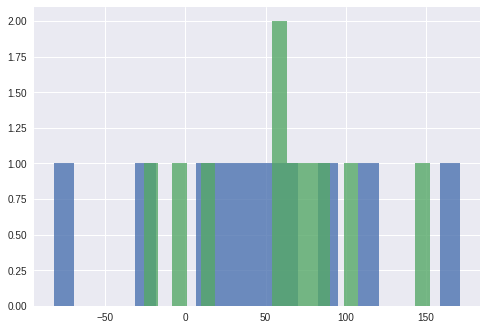

In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp

#@markdown ## グループA
#@markdown ### 正規分布の設定
平均A = 50 #@param {type: "number"}
標準偏差A = 50 #@param {type: "number"}
#@markdown ### 被験者は何人？
標本数A = 10 #@param {type: "number"}

values1 = np.random.normal(平均A, 標準偏差A, 標本数A)

#@markdown ## グループB
#@markdown ### 正規分布の設定
平均B = 60 #@param {type: "number"}
標準偏差B = 50 #@param {type: "number"}
#@markdown ### 被験者は何人？
標本数B = 10 #@param {type: "number"}

values2 = np.random.normal(平均B, 標準偏差B, 標本数B)

plt.hist(values1, bins=20, alpha=0.8)
plt.hist(values2, bins=20, alpha=0.8)
t, p = sp.stats.ttest_ind(values1, values2)
print("p=" + str(p))
if p < 0.05:
  print("有意差あり")
else:
  print("有意差なし")

# 演習3 標本数とp値の関係を調べよう




In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp

ps = []

#@markdown ## グループAの設定
平均値A = 170 #@param {type: "number"}
標準偏差A = 5 #@param {type: "number"}

#@markdown ## グループBの設定
平均値B = 169 #@param {type: "number"}
標準偏差B = 5 #@param {type: "number"}


for i in range(15):
  values1 = np.random.normal(平均値A, 標準偏差A, 2**(i+1))
  values2 = np.random.normal(平均値B, 標準偏差B, 2**(i+1))
  t, p = sp.stats.ttest_ind(values1, values2)
  ps.append("標本数が"+str(2**(i+1)) +"のとき，p="+str(p))

ps

['標本数が2のとき，p=0.7767757914084946',
 '標本数が4のとき，p=0.5068739951848094',
 '標本数が8のとき，p=0.6999302722321081',
 '標本数が16のとき，p=0.3235234048515053',
 '標本数が32のとき，p=0.10823391911604528',
 '標本数が64のとき，p=0.19891813420118823',
 '標本数が128のとき，p=0.0984412707228852',
 '標本数が256のとき，p=0.002833931322129292',
 '標本数が512のとき，p=0.0006150559507922487',
 '標本数が1024のとき，p=2.170490966439669e-06',
 '標本数が2048のとき，p=6.466151631006667e-12',
 '標本数が4096のとき，p=1.135095841920149e-16',
 '標本数が8192のとき，p=1.9286468638839875e-37',
 '標本数が16384のとき，p=7.52004060323118e-77',
 '標本数が32768のとき，p=6.61872699678535e-143']

# 演習4 同じ分布のデータ間でt検定してみよう

「有意差あり」になった回数は1000回サンプリングしたうち44回です．


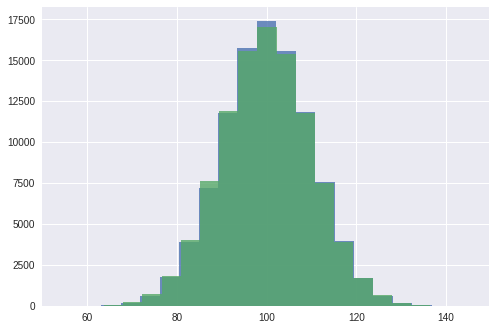

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp

#@markdown ## 分布の設定

平均値 = 100 #@param {type: "number"}
標準偏差 = 10 #@param {type: "number"}
標本数 = 10 #@param {type: "number"}

#@markdown ## 同じ分布の母集団から無作為抽出した2つの群を作り，t検定にかける．
サンプリング回数 = 1000 #@param {type: "number"}
有意水準 = 0.05 #@param {type: "number"}

# 母集団のヒストグラム
plt.hist(np.random.normal(平均値, 標準偏差, 100000), bins=20, alpha=0.8)
plt.hist(np.random.normal(平均値, 標準偏差, 100000), bins=20, alpha=0.8)

sig_count = 0;

for i in range(サンプリング回数):
  values1 = np.random.normal(平均値, 標準偏差, 標本数)
  values2 = np.random.normal(平均値, 標準偏差, 標本数)
  t, p = sp.stats.ttest_ind(values1, values2)
  if p < 有意水準:
    sig_count += 1

print("「有意差あり」になった回数は" + str(サンプリング回数) + "回サンプリングしたうち" + str(sig_count) + "回です．")

# 演習5 パワーアナリシスをやってみよう

In [160]:
from statsmodels.stats.power import tt_ind_solve_power
#@markdown ## t検定が満たしてほしい基準
# 平均値の差
平均値の差 = 0.5 #@param {type: "number"}
# 標準偏差
標準偏差    = 1 #@param {type: "number"}
# 有意水準
有意水準   = 0.05 #@param {type: "number"}
# 検出力
検出力= 0.8 #@param {type: "number"}
# 効果量 (平均値の差 / 標準偏差 )
効果量 = 平均値の差 / 標準偏差
# 両側検定
alternative='two-sided'
n = tt_ind_solve_power(effect_size=効果量,  alpha=有意水準, power=検出力, alternative=alternative)
print("必要な被験者数は"+str(n)+"人")

必要な被験者数は63.765611775409525人


# 演習6 求めた標本数で必要な検出力を満たせるか

In [163]:
# 平均値の差
平均値の差 = 0.5 #@param {type: "number"}
# 標準偏差
標準偏差    = 1 #@param {type: "number"}
# 有意水準
有意水準   = 0.05 #@param {type: "number"}
# 標本数
標本数   = 64 #@param {type: "number"}

サンプリング回数 = 1000 #@param {type: "number"}

no_sig_count = 0

for i in range(サンプリング回数):
  values1 = np.random.normal(0, 標準偏差, 標本数)
  values2 = np.random.normal(平均値の差, 標準偏差, 標本数)
  t, p = sp.stats.ttest_ind(values1, values2)
  if p > 0.05:
    no_sig_count +=1

print("「有意差なし」になった回数は" + str(サンプリング回数) + "回サンプリングしたうち" + str(no_sig_count) + "回です．")

「有意差なし」になった回数は1000回サンプリングしたうち206回です．
